In [104]:
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from numpy import array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping





In [105]:
locale.setlocale(locale.LC_TIME, 'pt_BR')
pd.options.display.float_format = '{:,.2f}'.format

# Carregar o arquivo CSV fornecido pelo usuário
data = pd.read_csv('CONSOLIDADO - Sheet1.csv')

# Exibir as primeiras linhas para entender o formato dos dados
data.head(1)

,Unnamed: 0,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,JAN,"191,895,829.31","242,104,718.73","267,588,170.58","312,110,769.32","356,299,534.87","430,624,313.83","490,302,303.35","493,104,486.09","518,921,589.68","584,797,196.33","488,638,742.43","523,105,807.50","540,025,422.21","644,176,440.61","607,898,106.68","654,879,023.24","734,801,161.42"


In [106]:
anos = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

i = 0
l = 1

while (l):
    data[anos[i]] = data[anos[i]].str.replace(',', '')
    if anos[i] == '2023':  # Verificar o valor correto, não o índice
        l = 0
    i += 1

data.head(1)
#remove a linha de totais
data_clean = data.iloc[:-1, :]

# Limpar valores removendo pontos de milhar e ajustando vírgulas
for year in anos:
    data_clean[year] = data_clean[year].str.rstrip('.').astype(float)

# Exibir as primeiras linhas após a conversão
data_clean.head(1)

C:\Users\PC\AppData\Local\Temp\ipykernel_4420\3003506430.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[year] = data_clean[year].str.rstrip('.').astype(float)
C:\Users\PC\AppData\Local\Temp\ipykernel_4420\3003506430.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[year] = data_clean[year].str.rstrip('.').astype(float)
C:\Users\PC\AppData\Local\Temp\ipykernel_4420\3003506430.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Unnamed: 0,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,JAN,"191,895,829.31","242,104,718.73","267,588,170.58","312,110,769.32","356,299,534.87","430,624,313.83","490,302,303.35","493,104,486.09","518,921,589.68","584,797,196.33","488,638,742.43","523,105,807.50","540,025,422.21","644,176,440.61","607,898,106.68","654,879,023.24","734,801,161.42"


In [ ]:
# Plotar gráfico de linha para ver a evolução dos valores ao longo dos anos
plt.figure(figsize=(10, 6))

# Plotar a série temporal para cada ano
for column in anos:
    plt.plot(data_clean['Unnamed: 0'], data_clean[column], label=column)

plt.title("Série Temporal por Ano (Dados Numéricos)")
plt.xlabel("Meses")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.legend(title="Ano")
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
data_clean = data_clean.drop(columns=['Unnamed: 0']).values

# Exemplo de input para previsão
n_steps = 3  # Número de timesteps (3 valores usados para previsão)
n_features = 1  # Cada valor da sequência é univariado

# normalizando
scaler = MinMaxScaler(feature_range=(0, 1))
# Redimensionar a sequência de entrada para 2D, necessária para o scaler
data_reshaped = np.array(data_clean).reshape(-1, 1)
scaled_seq = scaler.fit_transform(data_reshaped)

#train = scaled_seq[:train_size]

# Verificar o tamanho dos dados
print("Tamanho dos dados:", scaled_seq.shape)



Tamanho dos dados: (204, 1)


In [ ]:
display(scaled_seq)

In [108]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# Exemplo de como dividir a sequência normalizada
X, y = split_sequence(scaled_seq.flatten(), n_steps)
display(X)

array([[0.05930493, 0.12940765, 0.16498818],
       [0.12940765, 0.16498818, 0.22715158],
       [0.16498818, 0.22715158, 0.28884888],
       [0.22715158, 0.28884888, 0.39262271],
       [0.28884888, 0.39262271, 0.47594639],
       [0.39262271, 0.47594639, 0.47985886],
       [0.47594639, 0.47985886, 0.51590525],
       [0.47985886, 0.51590525, 0.60788217],
       [0.51590525, 0.60788217, 0.47362369],
       [0.60788217, 0.47362369, 0.52174734],
       [0.47362369, 0.52174734, 0.54537087],
       [0.52174734, 0.54537087, 0.69078874],
       [0.54537087, 0.69078874, 0.64013615],
       [0.69078874, 0.64013615, 0.70573191],
       [0.64013615, 0.70573191, 0.8173209 ],
       [0.70573191, 0.8173209 , 0.00540494],
       [0.8173209 , 0.00540494, 0.05442788],
       [0.00540494, 0.05442788, 0.08105109],
       [0.05442788, 0.08105109, 0.11935817],
       [0.08105109, 0.11935817, 0.17813843],
       [0.11935817, 0.17813843, 0.2271007 ],
       [0.17813843, 0.2271007 , 0.30953403],
       [0.

In [ ]:
# Função para criar as janelas de tempo para o LSTM (talvez quase certo que não é necessário)
def create_dataset(dataset, time_steps):
    X, y = [], []
    if len(dataset) > time_steps:  # Verifica se há dados suficientes
        for i in range(len(dataset) - time_steps):
            X.append(dataset[i:i + time_steps])
            y.append(dataset[i + time_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, time_steps)
print(X_train)

In [109]:
print(len(X))
print(len(X) * 0.7)
print(int(len(X) * 0.7))

201
140.7
140


In [110]:
# split into samples
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Exemplo de divisão cronológica (70% treino, 20% validação, 10% teste)
# Isso resulta em:
#  - 70% para treinamento
#  - 20% para validação
#  - 10% para teste
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)
test_size = len(X) - train_size - val_size

# Separar os dados
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:(train_size + val_size)], y[train_size:(train_size + val_size)]
X_test, y_test = X[(train_size + val_size):], y[(train_size + val_size):]


print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print(X_train)
print(y_train)
print(X_val)
print(y_val)
print(X_test)
print(y_test)


X_train shape: (140, 3, 1), y_train shape: (140,)
X_val shape: (40, 3, 1), y_val shape: (40,)
X_test shape: (21, 3, 1), y_test shape: (21,)
[[[0.05930493]
  [0.12940765]
  [0.16498818]]

 [[0.12940765]
  [0.16498818]
  [0.22715158]]

 [[0.16498818]
  [0.22715158]
  [0.28884888]]

 [[0.22715158]
  [0.28884888]
  [0.39262271]]

 [[0.28884888]
  [0.39262271]
  [0.47594639]]

 [[0.39262271]
  [0.47594639]
  [0.47985886]]

 [[0.47594639]
  [0.47985886]
  [0.51590525]]

 [[0.47985886]
  [0.51590525]
  [0.60788217]]

 [[0.51590525]
  [0.60788217]
  [0.47362369]]

 [[0.60788217]
  [0.47362369]
  [0.52174734]]

 [[0.47362369]
  [0.52174734]
  [0.54537087]]

 [[0.52174734]
  [0.54537087]
  [0.69078874]]

 [[0.54537087]
  [0.69078874]
  [0.64013615]]

 [[0.69078874]
  [0.64013615]
  [0.70573191]]

 [[0.64013615]
  [0.70573191]
  [0.8173209 ]]

 [[0.70573191]
  [0.8173209 ]
  [0.00540494]]

 [[0.8173209 ]
  [0.00540494]
  [0.05442788]]

 [[0.00540494]
  [0.05442788]
  [0.08105109]]

 [[0.05442788]

In [111]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [112]:
# define model
model = Sequential()
model.add(Input(shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

# fit model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val),
                    callbacks=[early_stopping], verbose=0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mae: 0.0803 - mape: 58.6922
Test MSE: 0.015618667006492615, Test MAE: 0.07832300662994385, Test MAPE: 50.40729904174805
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mae: 0.1487 - mape: 63.3440 9
Test MSE: 0.0570804737508297, Test MAE: 0.1651511937379837, Test MAPE: 48.62883758544922


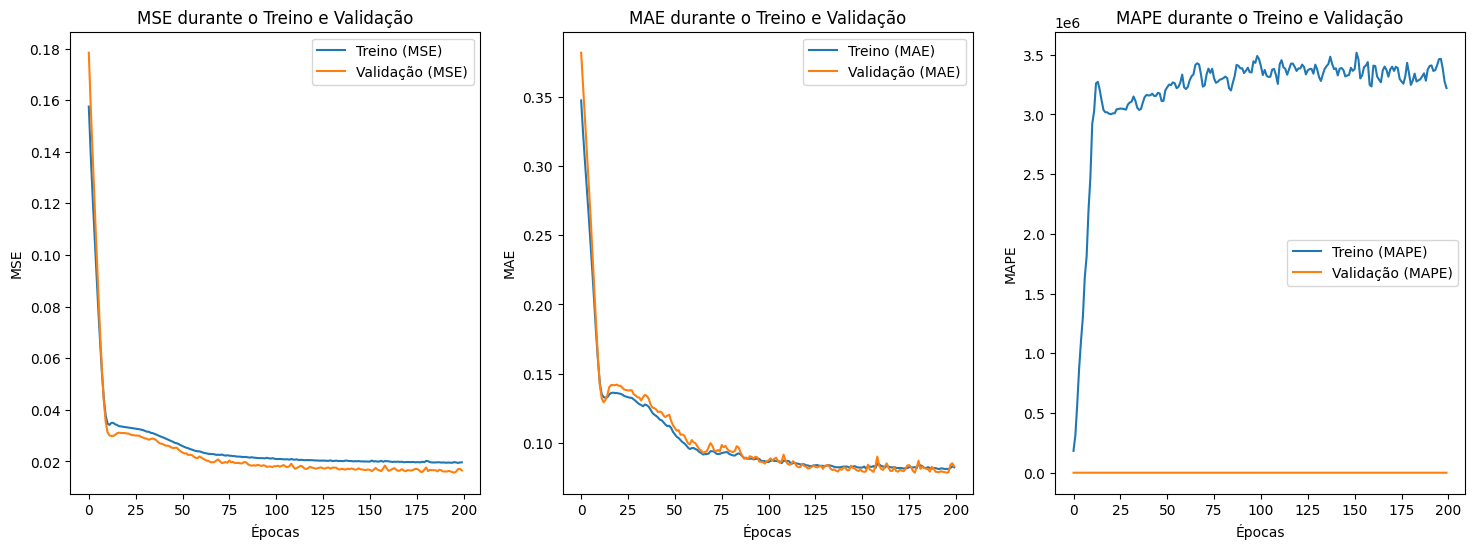

In [113]:
# Supondo que o modelo já foi treinado...



# Avaliar o modelo no conjunto de validacao
val_loss, val_mae, val_mape = model.evaluate(X_val, y_val, steps=n_steps, verbose=1)
print(f'Test MSE: {val_loss}, Test MAE: {val_mae}, Test MAPE: {val_mape}')


# Avaliar o modelo no conjunto de teste
test_loss, test_mae, test_mape = model.evaluate(X_test, y_test, steps=n_steps, verbose=1)
print(f'Test MSE: {test_loss}, Test MAE: {test_mae}, Test MAPE: {test_mape}')

# Função para plotar o gráfico de treino e validação
def plot_training_history(history):
    plt.figure(figsize=(18, 6))

    # Plotar o erro quadrático médio (MSE) durante o treino e validação
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Treino (MSE)')
    plt.plot(history.history['val_loss'], label='Validação (MSE)')
    plt.title('MSE durante o Treino e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.legend()

    # Plotar o erro absoluto médio (MAE) durante o treino e validação
    plt.subplot(1, 3, 2)
    plt.plot(history.history['mae'], label='Treino (MAE)')
    plt.plot(history.history['val_mae'], label='Validação (MAE)')
    plt.title('MAE durante o Treino e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()


    # Plotar o erro absoluto percentual médio (MAPE) durante o treino e validação
    plt.subplot(1, 3, 3)
    plt.plot(history.history['mape'], label='Treino (MAPE)')
    plt.plot(history.history['val_mape'], label='Validação (MAPE)')
    plt.title('MAPE durante o Treino e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('MAPE')
    plt.legend()


    plt.show()

# Plotar o histórico de treinamento
plot_training_history(history)

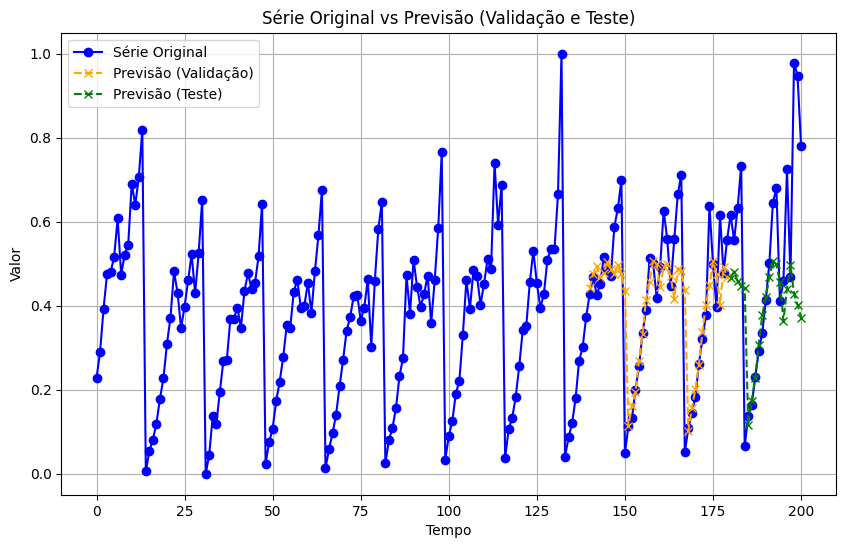

In [114]:
# Fazer previsões com o conjunto de validação e teste
y_val_pred = model.predict(X_val, verbose=0)
y_test_pred = model.predict(X_test, verbose=0)

# Função para plotar a série original e as previsões
def plot_original_vs_predicted(y_train, y_val, y_test, y_val_pred, y_test_pred):
    plt.figure(figsize=(10, 6))

    # Concatena a série original completa (treino + validação + teste)
    total_y = np.concatenate([y_train, y_val, y_test], axis=0)

    # Concatena as previsões (com NaNs para o início onde não há previsão)
    val_preds = np.concatenate([np.full_like(y_train, np.nan), y_val_pred.flatten()])
    test_preds = np.concatenate([np.full_like(np.concatenate([y_train, y_val]), np.nan), y_test_pred.flatten()])

    # Plotar a série original
    plt.plot(total_y, label='Série Original', color='blue', marker='o')

    # Plotar as previsões de validação
    plt.plot(val_preds, label='Previsão (Validação)', color='orange', linestyle='dashed', marker='x')

    # Plotar as previsões de teste
    plt.plot(test_preds, label='Previsão (Teste)', color='green', linestyle='dashed', marker='x')

    # Adicionar legendas e títulos
    plt.title('Série Original vs Previsão (Validação e Teste)')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

# Chamar a função para plotar
plot_original_vs_predicted(y_train, y_val, y_test, y_val_pred, y_test_pred)